In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
img = cv2.imread('data/bird.jpg')
# opencv裡面是ＢＧＲ陣列 所以需要 ＢＧＲ2ＲＧＢ
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [9]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

In [16]:
h, w, c = img.shape
# 高 寬 chanel數 ＲＧＢ
print(img.shape)

Z = img.reshape((-1,3))
K=2
label, center = km_clust(Z, K)

center = np.uint8(center[:, :3])
center
res = center[label.flatten()]
res = res.reshape(img.shape)

(1024, 1024, 3)
[[163.22702817 197.72943995 120.58583985]
 [107.71916359  95.58781582  71.61649689]]


[[163.2205191  197.6979282  120.57752362]
 [107.58799118  95.46671536  71.51662355]]
[[183.73946625 182.45273139 164.4805315 ]
 [160.64806029 204.77310145 114.70133439]
 [ 57.88587692  54.81868482  45.97603694]
 [143.66836904 128.01018964  96.87755203]]
[[163.40586657 211.83342106 117.66283414]
 [113.97772993  98.32715468  66.84273027]
 [197.83566925 198.8950328  186.2496592 ]
 [ 37.80866326  40.16122776  40.88602919]
 [154.67412436 192.7338294  110.88773548]
 [169.42790623 163.18793305 141.22704696]
 [148.35959219 132.60851966 102.63364458]
 [220.2817447  190.7745032   36.86544291]]
[[165.29791547 213.74082163 119.51074684]
 [133.47234757 119.65529126  88.88177139]
 [151.96614487 136.72404705 106.98278942]
 [ 45.56607791  56.69862798  69.74310046]
 [174.86517409 173.8488123  152.1816277 ]
 [140.78030994 182.26092693 107.42884901]
 [216.37886215 215.80124777 210.16696376]
 [157.19367986 192.92271336 112.2022501 ]
 [228.71781646 203.08467655  37.26262626]
 [112.16514832  99.97172399  68

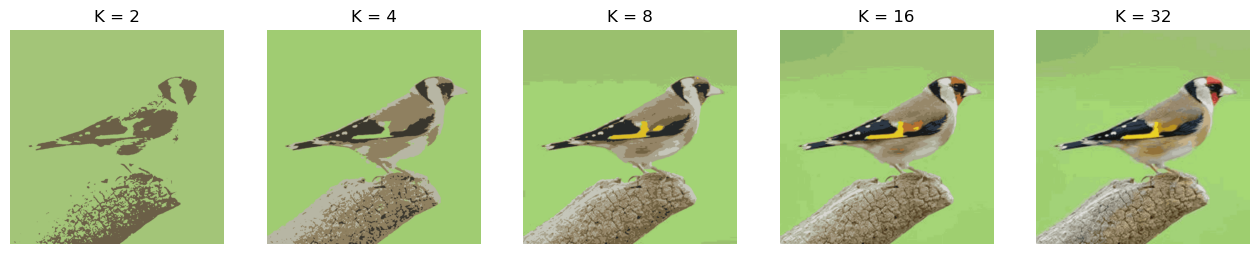

In [20]:
h, w, c = img.shape
Z = img.reshape((-1, 3))

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-2. cluster with RGB values and the location

[[156.35797233 180.05640784 110.30222324 513.41390937 766.28487545]
 [154.52830174 186.80329729 117.17537747 509.56800869 254.30800674]]
[[151.91299466 194.07415427 111.31322609 254.31475371 256.09032026]
 [157.15109556 182.85828184 111.38145054 768.77754921 766.59319957]
 [155.64166793 177.5350175  109.35660858 257.07655228 767.84347131]
 [157.08197742 179.21168335 122.85627222 766.60267988 254.36764588]]
[[148.9038664  188.87726098 110.95460263 513.76398288 233.35205009]
 [159.20916872 178.01458001 108.95850144 509.91550627 790.91877539]
 [157.43546435 182.41438943 114.36819771 170.25302511 856.91009546]
 [160.13732105 202.62206316 117.74498253 852.31953387 861.60698507]
 [164.55330532 188.53861131 134.31870034 850.97028747 167.66809502]
 [152.20942701 194.40155255 111.85540973 171.6121719  166.13136611]
 [147.17412451 145.29436056 104.57616315 809.49292335 518.39845972]
 [156.11633899 192.90264169 110.81265522 214.14262709 511.12381102]]
[[132.39173516 159.05879931  96.44451542 419.

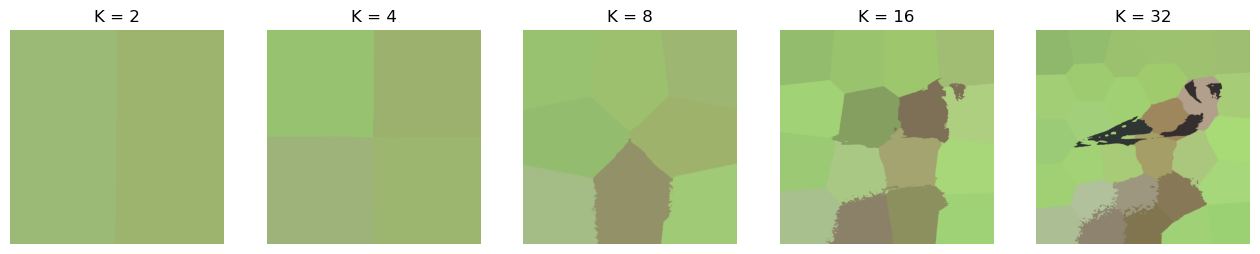

In [17]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[152.88227169 174.08509473 108.01417285 133.9123962  187.24299146]
 [158.3350024  193.91537212 120.14857011 121.07880624  61.04546625]]
[[157.91325262 192.77314093 112.34852698  45.81727416 124.49885044]
 [166.1144448  199.74496937 129.64798292 167.91885552  51.45271459]
 [114.08771318 101.9832529   75.93405866 173.20609978 137.88732564]
 [167.57018266 206.12603192 123.01253369 169.26782336 211.83974547]]
[[167.97696545 200.46125374 133.56313336 187.90563293  52.99434719]
 [158.12211191 199.69085424 110.69945624  45.28416944 126.0876548 ]
 [164.69362771 211.16926476 120.56866395 194.27397004 212.03717074]
 [162.35937724 144.33688996 104.98998113 123.0940593  156.70201867]
 [166.64665416 198.51673867 122.26280742  56.5381584  220.72483125]
 [132.4062366  120.11395661  90.52717676 218.21082593 128.05481322]
 [156.18421007 200.93527568 114.52628491  67.29776813  41.89339354]
 [ 46.76916331  47.81352522  45.85680388 116.81237104 136.51519138]]
[[165.95656743 206.48556417 123.47615712 160.

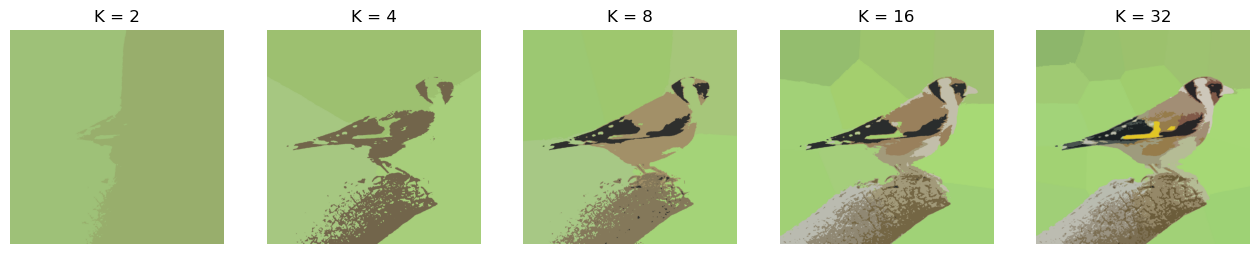

In [21]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()